# Display Water Quality Sites
---------------------

In [63]:
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt


import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon



In [2]:
%matplotlib inline

In [3]:
water_sites_file = 'd:/water/Cleaned Site Details.xlsx'

water_df  = pd.read_excel(water_sites_file, sheet_name='Sheet1',)

In [5]:
water_df.head()

,Waterway,Site Code,Site Name,Water Body Type,latitude,longitude
0,Cornmeal Creek,CRN700,"Duporth Ave Bridge, Maroochydore",Enclosed Coastal/Lower estuary,-26.697250,152.980694
1,Cornmeal Creek,CRN800,"Horton Parade Bridge, Maroochydore",Middle Estuary,-26.653564,153.090566
2,Cornmeal Creek,CRN900,"Duporth Ave Bridge, Maroochydore",Middle Estuary,-26.655556,153.087806
3,Paynter Creek,DUC100,"Duck Ponds (Kolora Park), Palmwoods",Lake / Lowland Freshwater,-26.685389,152.959944
4,South Maroochy River,ECH700,"Sherwell Road (Savage Property), Dulong",Lowland Freshwater,-26.626778,152.882611


In [6]:
water_df.columns

Index(['Waterway', 'Site Code', 'Site Name', 'Water Body Type', 'latitude',
       'longitude'],
      dtype='object')

In [7]:
water_df['latitude'].min(), water_df['latitude'].max(), water_df['longitude'].min(), water_df['longitude'].max()

(-26.724528, -26.459611, 152.882611, 153.092194)

In [74]:
BORDERS_10m = cartopy.feature.NaturalEarthFeature('cultural', 
                                                  'admin_0_boundary_lines_land',
                                                  '10m', 
                                                  edgecolor='black', 
                                                  facecolor='none')
#"""country boundaries."""


BORDERS2_10m = cartopy.feature.NaturalEarthFeature('cultural', 
                                                   'admin_1_states_provinces',
                                                  '10m', 
                                                   edgecolor='black', 
                                                   facecolor='none')
#"""country boundaries."""

COASTLINE_10m = cartopy.feature.NaturalEarthFeature('physical', 
                                                    'coastline', 
                                                    '10m',
                                                    edgecolor='black', 
                                                    facecolor='none')
#"""coastline, including major islands."""


LAKES_10m = cartopy.feature.NaturalEarthFeature('physical', 
                                                'lakes', 
                                                '10m',
                                                edgecolor='face',
                                                facecolor=cartopy.feature.COLORS['water'])
#""" natural and artificial lakes."""


LAND_10m = cartopy.feature.NaturalEarthFeature('physical', 
                                               'land', 
                                               '10m',
                                                edgecolor='face',
                                               facecolor='cornsilk')
#"""land polygons, including major islands."""


OCEAN_10m = cartopy.feature.NaturalEarthFeature('physical', 
                                                'ocean', 
                                                '10m',
                                                edgecolor='face',
                                                facecolor=cartopy.feature.COLORS['water'])
#"""Small scale (1:110m) ocean polygons."""


RIVERS_10m = cartopy.feature.NaturalEarthFeature('physical', 
                                                 'rivers_lake_centerlines', 
                                                 '10m',
                                                 edgecolor=cartopy.feature.COLORS['water'],
                                                 facecolor='none')
#"""single-line drainages, including lake centerlines."""

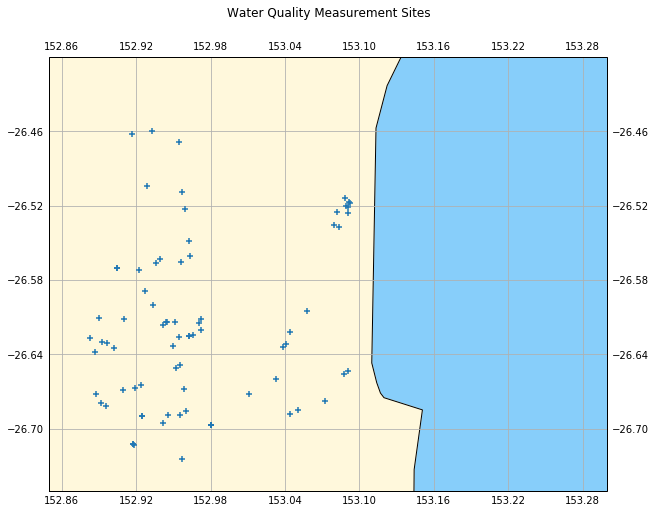

In [84]:
fig = plt.figure(figsize=(10,10) )




water_extent = (152.85, 153.3, -26.75, -26.4)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(), )
ax.background_patch.set_facecolor('lightskyblue')

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

ax.set_extent(water_extent, crs=ccrs.PlateCarree())

#land polygons, including major islands, use cartopy default color
ax.add_feature(LAND_10m)
ax.add_feature(COASTLINE_10m)
ax.gridlines(draw_labels=True)

cb = plt.scatter(water_df['longitude'], water_df['latitude'], 
            marker='+',
            linewidths=1,
            transform=ccrs.PlateCarree(), 
            zorder=5,
                )

ax.set_title('Water Quality Measurement Sites', pad=40)

plt.show()


In [28]:
water_df['Waterway'].unique()

array(['Cornmeal Creek', 'Paynter Creek', 'South Maroochy River',
       'Petrie Creek', 'Maroochy River', 'Eudlo Creek',
       'North Maroochy River', 'Martins Creek', 'Stumers Creek',
       'Tuckers Creek'], dtype=object)

In [29]:
pd.value_counts(water_df['Waterway'].values,)

Petrie Creek            22
South Maroochy River    16
Stumers Creek            9
Paynter Creek            9
North Maroochy River     7
Eudlo Creek              5
Cornmeal Creek           3
Martins Creek            3
Maroochy River           2
Tuckers Creek            1
dtype: int64

In [87]:
pd.value_counts(water_df['Water Body Type'].values,)

Lowland Freshwater                59
Middle Estuary                     5
Wetland                            5
Wetlands                           2
Lower Estuary                      2
Upper Estuary                      1
Lake / Lowland Freshwater          1
Enclosed Coastal/Lower estuary     1
Lake / Middle Estuary              1
dtype: int64

In [42]:
geometry = [Point(xy) for xy in zip(water_df['longitude'], water_df['latitude'])]
    
crs = {'init': 'epsg:4326'}
gwater = gpd.GeoDataFrame(water_df, crs=crs, geometry=geometry)

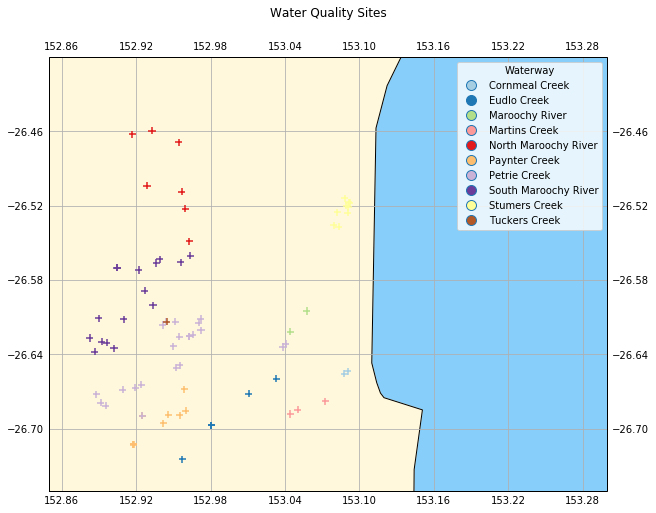

In [85]:
fig = plt.figure(figsize=(10,10) )

water_extent = (152.85, 153.3, -26.75, -26.4)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(water_extent, crs=ccrs.PlateCarree())

ax.background_patch.set_facecolor('lightskyblue')

#land polygons, including major islands, use cartopy default color
ax.add_feature(LAND_10m)
ax.add_feature(COASTLINE_10m)
ax.gridlines(draw_labels=True)

gwater.plot(ax=ax, 
         marker='+', 
        column='Waterway', 
        cmap='Paired', 
        markersize=50, 
        zorder=5, 
        legend=True,
        categorical=True,
)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.8, 0.2, 0.2) )
leg.set_title('Waterway')
ax.set_title(label='Water Quality Sites', loc='center', pad=40, )

plt.show()



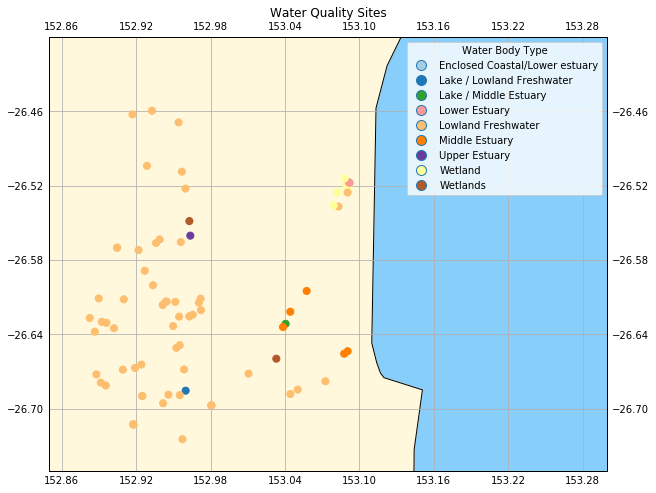

In [86]:
fig = plt.figure(figsize=(10,10) )

water_extent = (152.85, 153.3, -26.75, -26.4)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(water_extent, crs=ccrs.PlateCarree())

ax.background_patch.set_facecolor('lightskyblue')

#land polygons, including major islands, use cartopy default color
ax.add_feature(LAND_10m)
ax.add_feature(COASTLINE_10m)
ax.gridlines(draw_labels=True)

gwater.plot(ax=ax, 
         marker='o', 
        column='Water Body Type', 
        cmap='Paired', 
        markersize=50, 
        zorder=5, 
        legend=True,
        categorical=True,
)

ax.set_title(label='Water Quality Sites', loc='center', pad=20, )

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.8, 0.2, 0.2) )
leg.set_title('Water Body Type')

plt.show()


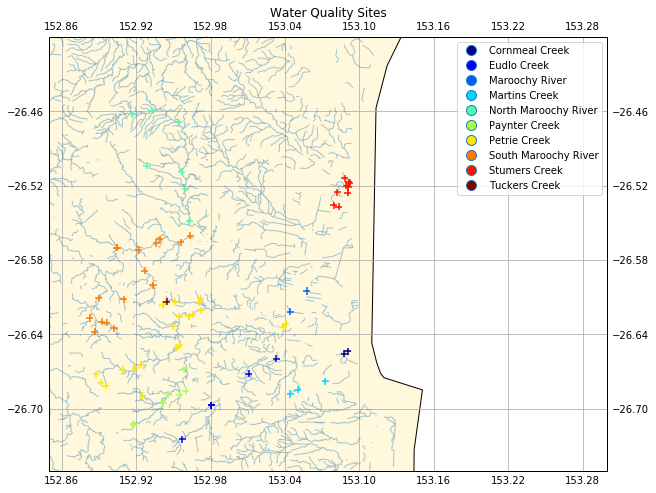

In [90]:
water_shpfile = 'd:/water/waterways/QLD_WWAYS_WWBW_STREAM_L.shp'
wg = gpd.read_file(water_shpfile)
    
fig = plt.figure(figsize=(10,10) )

water_extent = (152.85, 153.3, -26.75, -26.4)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(water_extent, crs=ccrs.PlateCarree())

#land polygons, including major islands, use cartopy default color
ax.add_feature(LAND_10m)
ax.add_feature(COASTLINE_10m)
ax.gridlines(draw_labels=True)

gwater.plot(ax=ax, 
         marker='+', 
        column='Waterway', 
        cmap='jet', 
        markersize=50, 
        zorder=5, 
        legend=True,
        categorical=True,
)

wg.plot(ax=ax, linewidth=1, alpha=0.4)

ax.set_title(label='Water Quality Sites', loc='center', pad=20, )

plt.show()

In [68]:
wg.crs

{'ellps': 'GRS80', 'no_defs': True, 'proj': 'longlat'}

In [64]:
water_shpfile = 'd:/water/waterways/QLD_WWAYS_WWBW_STREAM_L.shp'

wg = gpd.read_file(water_shpfile)

In [66]:
wg.tail()

,FISH_PASS,geometry
957817,1,LINESTRING (145.7256455555555 -16.991102777250...
957818,2,LINESTRING (145.7344466301394 -16.990127652161...
957819,2,LINESTRING (145.7325972219844 -17.027772777191...
957820,2,LINESTRING (145.7302718511139 -16.928229161513...
957821,4,LINESTRING (145.7364407481662 -16.869021431991...


In [ ]:
ax.set_axis